## Notebook Imports and Packages

In [403]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # colormap

%matplotlib inline

# Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [304]:
def f(x):
    return x**2 + x + 1

In [306]:
# Make Data 
x_1 = np.linspace(start=-3, stop=3, num=500)

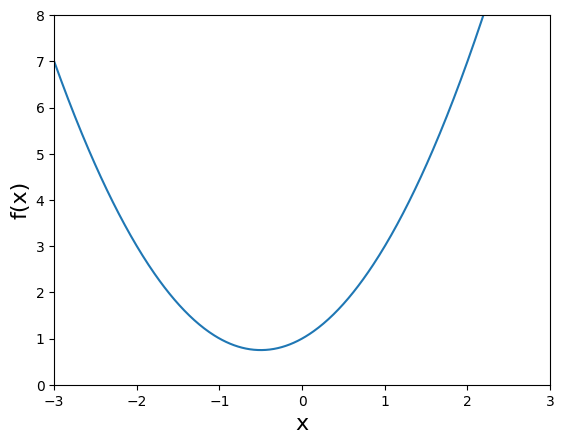

In [308]:
plt.xlim([-3,3])
plt.ylim(0, 8)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

Challenge: Create a p[ython function pfor the derivative of the f(x) called df(x)

In [311]:
def df(x):
    return 2*x + 1

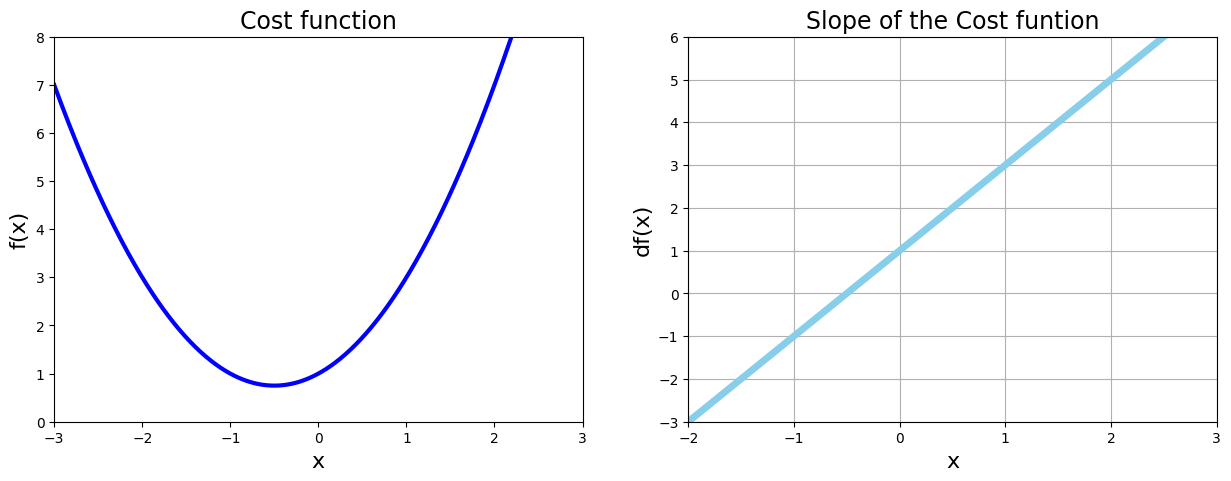

In [313]:
# PLot functinon and derivative side by side

plt.figure(figsize=[15, 5])
# 1 chart: cost function
plt.subplot(1, 2, 1)

plt.xlim([-3,3])
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 chart: Derivative
plt.subplot(1, 2, 2)
plt.title('Slope of the Cost funtion', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim([-2,3])
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

In [315]:
## Python Loops & Gradient Descent

In [317]:
# Python For Loop
for i in range(5):
    print('Hello world', i)
print('End of loop')

Hello world 0
Hello world 1
Hello world 2
Hello world 3
Hello world 4
End of loop


In [319]:
# Python While Loop
counter = 0 
while counter < 7:
    print('counting counter...', counter)
    counter = counter + 1 
print('Ready or not, here I come!')

counting counter... 0
counting counter... 1
counting counter... 2
counting counter... 3
counting counter... 4
counting counter... 5
counting counter... 6
Ready or not, here I come!


In [321]:
# Gradient Descent
new_x = 3 
previous_x = 0 
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x] 
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient 

    step_size = abs(new_x - previous_x) 

    x_list.append(new_x) 
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is: ', df(new_x))
print('f(x) value at this point is: ', f(new_x))

Loop ran this many times 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is:  7.992587079153068e-05
f(x) value at this point is:  0.7500000015970362


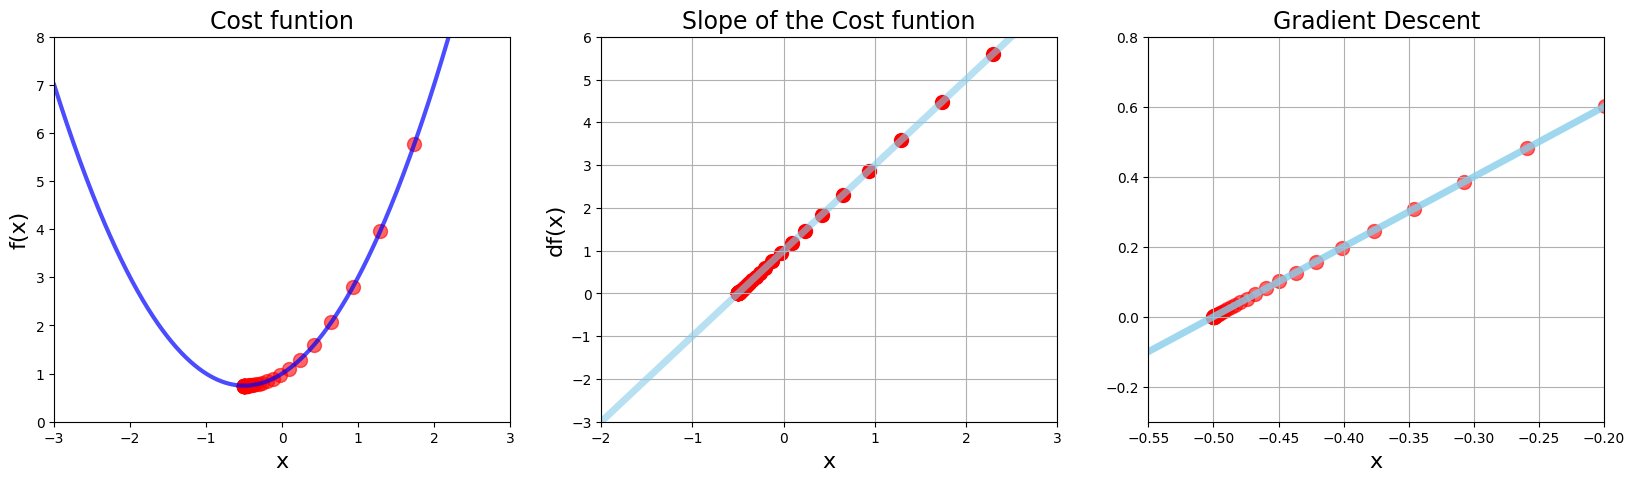

In [323]:
# Superimpose the GRadient descent calculations PLot functino and derivative side by side

plt.figure(figsize=[20, 5])
# 1 chart: cost function
plt.subplot(1, 3, 1)

plt.xlim([-3,3])
plt.ylim(0, 8)

plt.title('Cost funtion', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.7)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha= 0.6)

# 2 chart: Derivative
plt.subplot(1, 3, 2)
plt.title('Slope of the Cost funtion', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim([-2,3])
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha = 0.6)
plt.scatter(x_list, slope_list, color='red', s=100)

# 3 chart: Derivative (close up)
plt.subplot(1, 3, 3)
plt.title('Gradient Descent', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.grid()
plt.xlim([-0.55,-0.2])
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha = 0.8)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=.6)






plt.show()

# Example 2 - Multiplie Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [326]:
# Make some data.
x_2 = np.linspace(-2, 2, 1000)

# Challenge: Write the g(x) funtion and the dg(x) funtion in python?

def g(x):
    return x**4 - 4 * x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

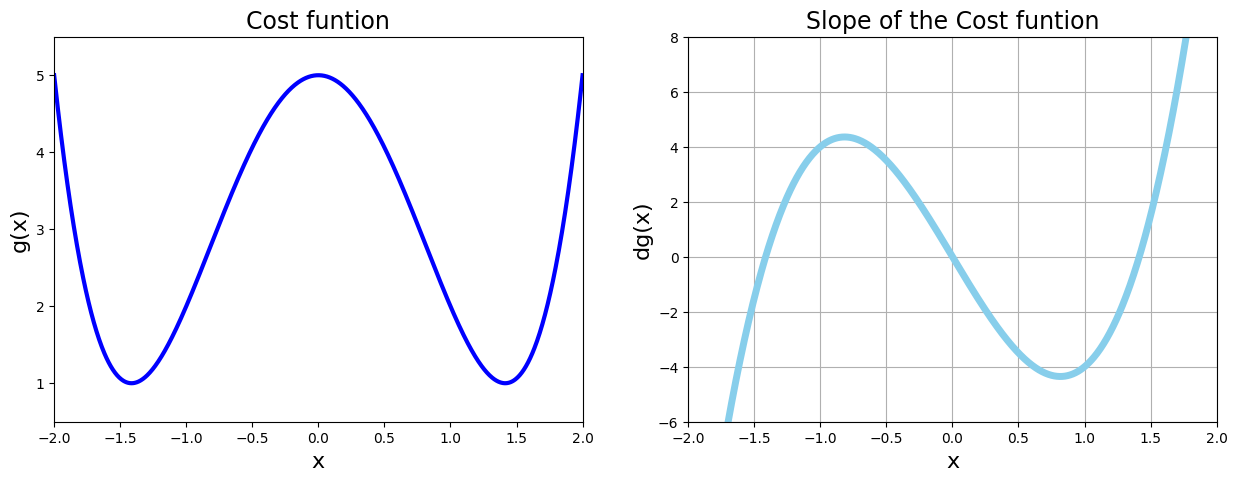

In [328]:
# PLot function and derivative side by side

plt.figure(figsize=[15, 5])
# 1 chart: cost function
plt.subplot(1, 2, 1)

plt.xlim([-2,2])
plt.ylim(0.5, 5.5)

plt.title('Cost funtion', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)

# 2 chart: Derivative
plt.subplot(1, 2, 2)
plt.title('Slope of the Cost funtion', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim([-2,2])
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent as a Python Function

In [331]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    new_x = initial_guess
    x_list = [new_x] 
    slope_list = [derivative_func(new_x)]
    
    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient 
    
        step_size = abs(new_x - previous_x)
        x_list.append(new_x) 
        slope_list.append(derivative_func(new_x))
        
        # Debugging output to trace execution
        # print(f"Step {n+1}: x = {new_x}, step size = {step_size}")

        if step_size < precision:
            break

    return new_x, x_list, slope_list

In [333]:
local_min, x_list, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(x_list))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [335]:
local_min, x_list, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5, multiplier=0.02, precision =0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(x_list))

Local min occurs at: -1.4122375085019094
Number of steps: 23


In [337]:
local_min, x_list, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(x_list))

Local min occurs at: -1.4120887490901561
Number of steps: 34


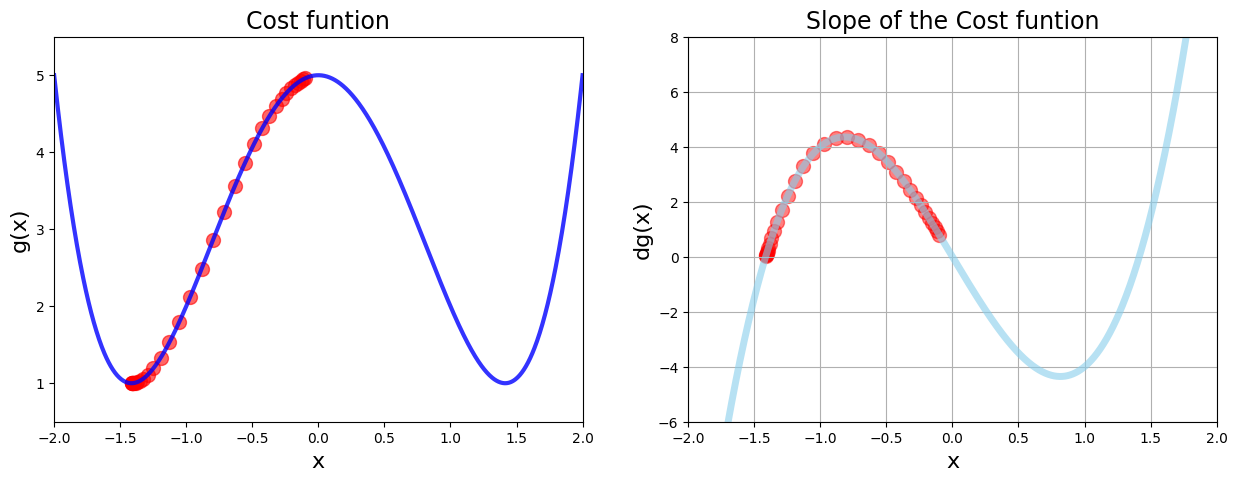

In [339]:
# Calling gradient descent function
local_min, x_list, deriv_list = gradient_descent(derivative_func=dg,initial_guess =  -0.1)
# Plot functinon derivative and scatter plot side by side

plt.figure(figsize=[15, 5])
# 1 chart: cost function
plt.subplot(1, 2, 1)

plt.xlim([-2,2])
plt.ylim(0.5, 5.5)

plt.title('Cost funtion', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(x_list, g(np.array(x_list)), color='red', s=100, alpha=0.6)

# 2 chart: Derivative
plt.subplot(1, 2, 2)
plt.title('Slope of the Cost funtion', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim([-2,2])
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

# Example 3 - Divergence, Overflow, and Python Tuples
## $$h(x) =  x^5 - 2x^4 + 2$$

In [342]:
# Make data 
x_3 = np.linspace(start =-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

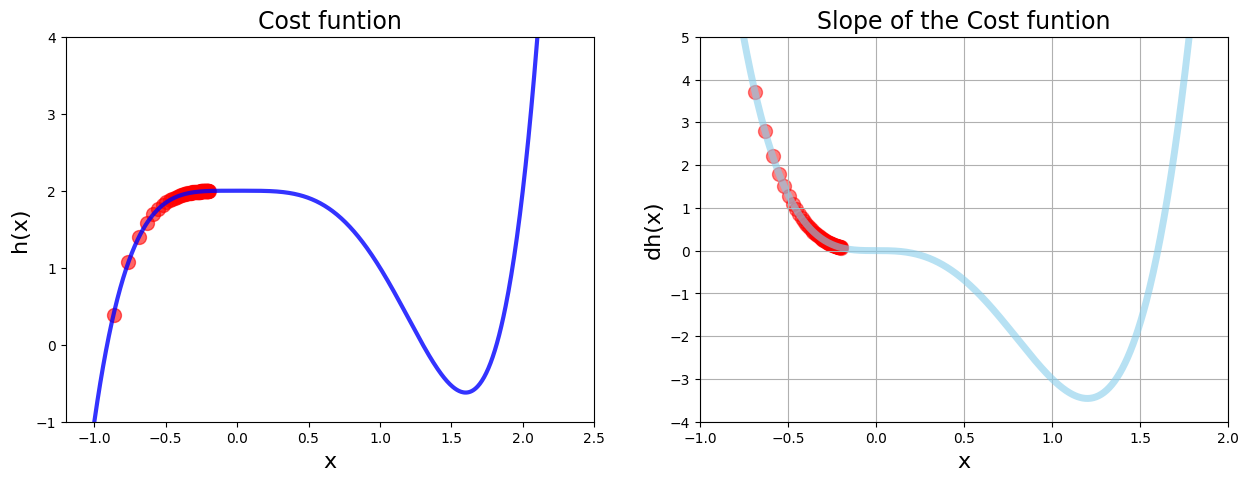

Local min occurs at:  -2071072.4470816324
Cost at this minimum is:  -3.810455326061589e+31
Number of steps:  71


In [344]:
# Calling gradient descent function
local_min, x_list, deriv_list = gradient_descent(derivative_func=dh, initial_guess= -0.2, max_iter=70)
# Plot functinon derivative and scatter plot side by side

plt.figure(figsize=[15, 5])
# 1 chart: cost function
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost funtion', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(x_list, h(np.array(x_list)), color='red', s=100, alpha=0.6)

# 2 chart: Derivative
plt.subplot(1, 2, 2)
plt.title('Slope of the Cost funtion', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.xlim([-1,2])
plt.ylim(-4, 5)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, deriv_list, color='red', s=100, alpha=0.5)

plt.show()
print('Local min occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(x_list))




In [346]:
# 380,000,000,000,000,000,000,000,000,000

In [348]:
import sys
# help(sys)
# sys.version
# type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

# Python Tuple

In [351]:
# Creating a Tuple
breakfast = 'bacon', 'eggs', 'avocado'
unlucky_numbers = 13, 4, 9, 26, 17
print('I love', breakfast[0])
print('My hotel has no ' + str(unlucky_numbers[1]) + 'th floor')
not_my_addres = 1, 'Infinite Loop', 'Cupertino', 95014
# breakfast[0] = 'sausege' Tuples are immutable and can not change them after they have been created

tuple_with_single_value = 42, 
print(tuple_with_single_value)
type(tuple_with_single_value)


main, side, greens = breakfast
print('main course is', main)
data_tuple = gradient_descent(derivative_func=dh, initial_guess=.2)
print('Local min is', data_tuple[0])
print('Cost at the last x value is', h(data_tuple[0]))
print('Number of steps is', len(data_tuple[1]))

I love bacon
My hotel has no 4th floor
(42,)
main course is bacon
Local min is 1.5989534547394717
Cost at the last x value is -0.6214287992331258
Number of steps is 117


# The Learning Rate

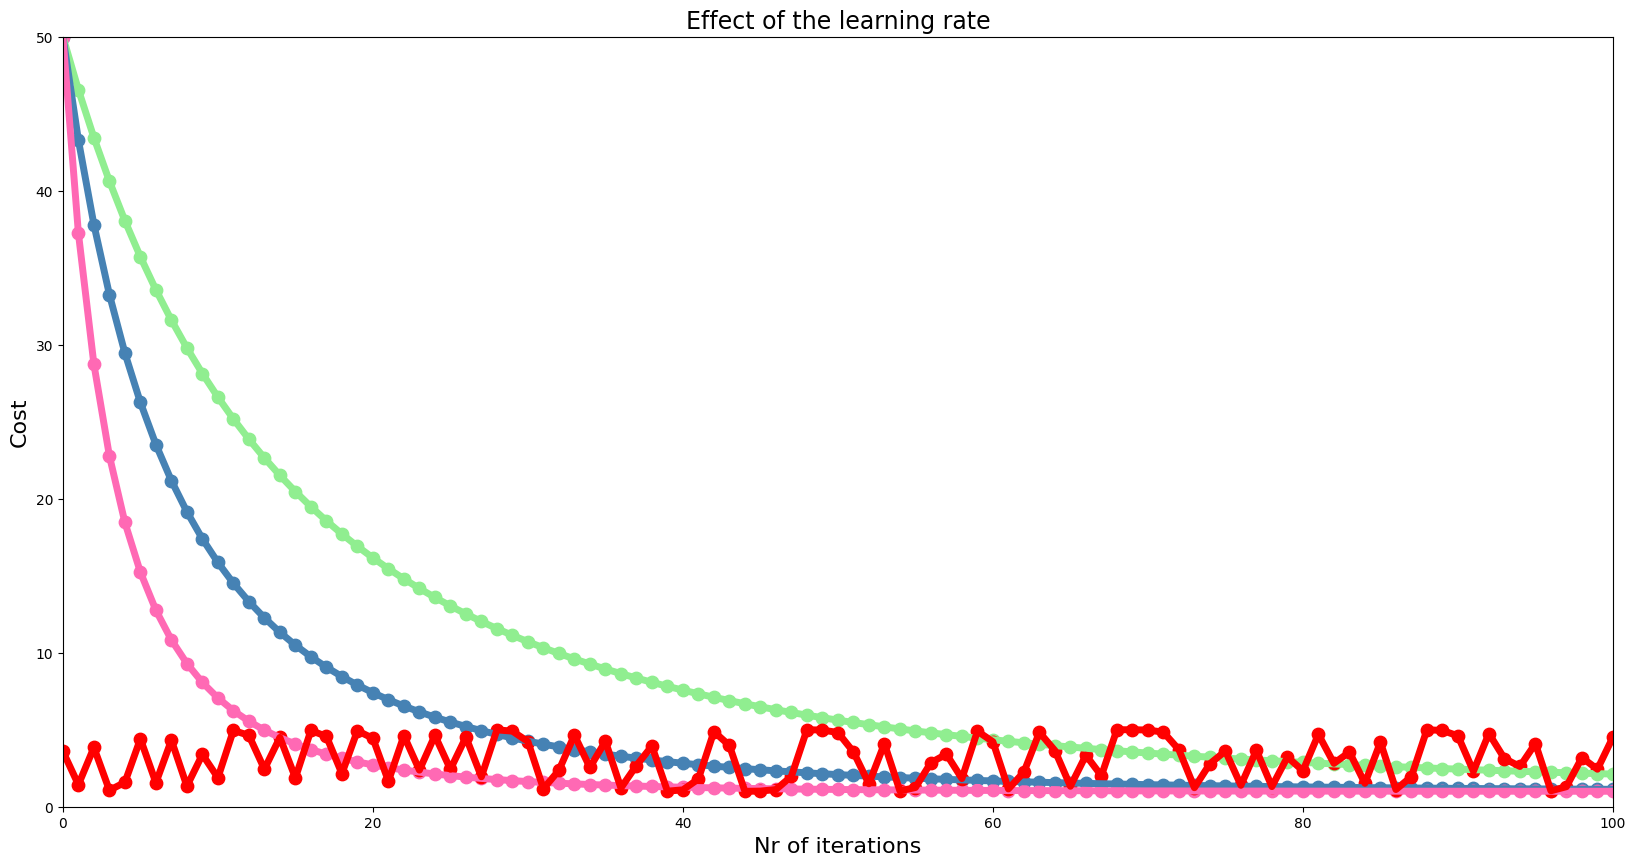

In [354]:
# Calling gradient descent function
n = 100
low_gamma= gradient_descent(derivative_func=dg,initial_guess =  3, multiplier=0.0005, precision= 0.0001, max_iter=n)


# Challenge: Plot two more learning rates: mid_gamma (0.001) and high_gamma (0.002) 

mid_gamma= gradient_descent(derivative_func=dg,initial_guess =  3, multiplier=0.001, precision= 0.0001, max_iter=n)

high_gamma= gradient_descent(derivative_func=dg,initial_guess =  3, multiplier=0.002, precision= 0.0001, max_iter=n)


# Experiment 
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.25, precision=0.0001, max_iter=n)


# Plotting reduction in cost for each iteration
plt.figure(figsize=[20, 10])

plt.xlim([0,n])
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('Nr of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our charts
# 1) Y Axis Data: convert the lists to numpy arrays 
low_values = np.array(low_gamma[1])

# 2) X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color = 'lightgreen', s=80)

# Plotting mid learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth=5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color = 'steelblue', s=80)

# Plotting high learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color='hotpink', linewidth=5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color = 'hotpink', s=80)

# Plotting insane learning rate
# Create a separate iteration list for insane_gamma
insane_iteration_list = list(range(0, len(insane_gamma[1])))
plt.plot(insane_iteration_list  , g(np.array(insane_gamma[1])), color='red', linewidth=5)
plt.scatter(insane_iteration_list, g(np.array(insane_gamma[1])), color = 'red', s=80)


plt.show()

# Example 4 Data Visualization with 3D Charts

## Minimize $$f(x, y) = \frac{1}{3^{-x^2 - Y^2} + 1} $$

Minimize $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$ 

In [357]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1) 

In [391]:
# Make out x and y data 

x_4 = np.linspace(start=-2, stop= 2, num=200) 
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of x array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)
x_4

Shape of x array (200,)
Array after meshgrid:  (200, 200)


array([[-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ],
       [-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ],
       [-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ],
       ...,
       [-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ],
       [-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ],
       [-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ]])

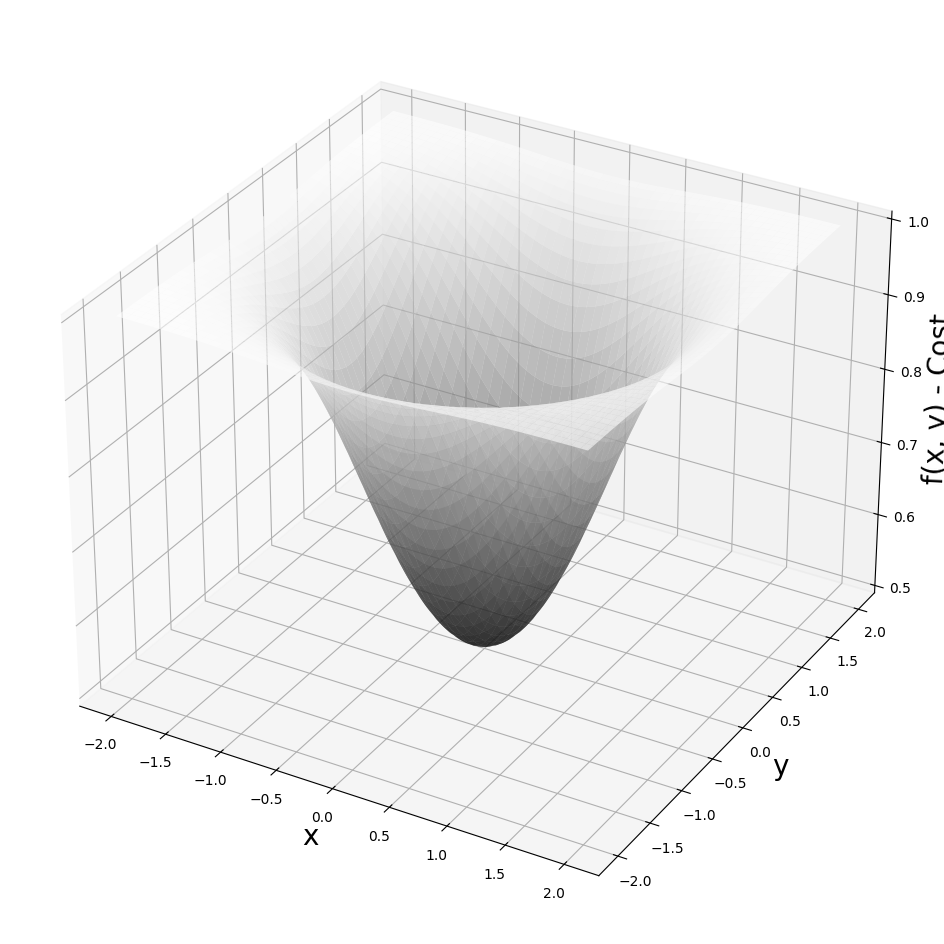

In [423]:
# Generating 3D PLot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.gist_gray, alpha=0.6)

plt.show()